In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

c:\users\prishitaray\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.contrib.layers import fully_connected

In [3]:
training_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_training-set.csv")
testing_df=pd.read_csv("F://ML Paper Project//UNSW_NB15_testing-set.csv")

In [4]:
training_data=np.array(training_df)
testing_data=np.array(testing_df)

In [5]:
training_data.shape

(175341, 45)

In [6]:
training_labels=training_data[:,43]

In [7]:
training_features=training_data[:,0:43]

In [8]:
training_labels

array(['Normal', 'Normal', 'Normal', ..., 'Generic', 'Generic', 'Generic'],
      dtype=object)

In [9]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [10]:
#Integer Encoding Labels
for i in range(0,len(training_labels)):
    if training_labels[i]=='Normal':
        training_labels[i]=0
    elif training_labels[i]=='Fuzzers':
        training_labels[i]=1
    elif training_labels[i]=='Analysis':
        training_labels[i]=2
    elif training_labels[i]=='Backdoor':
        training_labels[i]=3
    elif training_labels[i]=='DoS':
        training_labels[i]=4
    elif training_labels[i]=='Exploits':
        training_labels[i]=5
    elif training_labels[i]=='Generic':
        training_labels[i]=6
    elif training_labels[i]=='Reconaissance':
        training_labels[i]=7
    elif training_labels[i]=='Shellcode':
        training_labels[i]=8
    elif training_labels[i]=='Worms':
        training_labels[i]=9

In [11]:
training_labels

array([0, 0, 0, ..., 6, 6, 6], dtype=object)

In [12]:
proto=np.unique(training_features[:,2])

In [13]:
l=training_features[:,3]
for i in range(0,len(l)):
    if l[i]=='-':
        l[i]=0
    elif l[i]=='dhcp':
        l[i]=1
    elif l[i]=='dns':
        l[i]=2
    elif l[i]=='ftp':
        l[i]=3
    elif l[i]=='ftp-data':
        l[i]=4
    elif l[i]=='http':
        l[i]=5
    elif l[i]=='irc':
        l[i]=6
    elif l[i]=='pop3':
        l[i]=7
    elif l[i]=='radius':
        l[i]=8
    elif l[i]=='smtp':
        l[i]=9
    elif l[i]=='snmp':
        l[i]=10
    elif l[i]=='ssh':
        l[i]=11
    elif l[i]=='ssl':
        l[i]=12

training_features[:,3]=l

In [14]:
training_features[:,3]

array([0, 0, 0, ..., 2, 2, 2], dtype=object)

In [15]:
np.unique(training_features[:,4])

array(['CON', 'ECO', 'FIN', 'INT', 'PAR', 'REQ', 'RST', 'URN', 'no'],
      dtype=object)

In [16]:
l=training_features[:,4]
for i in range(0,len(l)):
    if l[i]=='CON':
        l[i]=0
    elif l[i]=='ECO':
        l[i]=1
    elif l[i]=='FIN':
        l[i]=2
    elif l[i]=='INT':
        l[i]=3
    elif l[i]=='PAR':
        l[i]=4
    elif l[i]=='REQ':
        l[i]=5
    elif l[i]=='RST':
        l[i]=6
    elif l[i]=='URN':
        l[i]=7
    elif l[i]=='no':
        l[i]=8

training_features[:,4]=l

In [17]:
training_features[:,4]

array([2, 2, 2, ..., 3, 3, 3], dtype=object)

In [18]:
training_features

array([[1, 0.121478, 'tcp', ..., 1, 1, 0],
       [2, 0.6499020000000001, 'tcp', ..., 1, 6, 0],
       [3, 1.623129, 'tcp', ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 'udp', ..., 3, 12, 0],
       [175340, 9e-06, 'udp', ..., 30, 30, 0],
       [175341, 9e-06, 'udp', ..., 30, 30, 0]], dtype=object)

In [19]:
proto

array(['3pc', 'a/n', 'aes-sp3-d', 'any', 'argus', 'aris', 'arp', 'ax.25',
       'bbn-rcc', 'bna', 'br-sat-mon', 'cbt', 'cftp', 'chaos',
       'compaq-peer', 'cphb', 'cpnx', 'crtp', 'crudp', 'dcn', 'ddp',
       'ddx', 'dgp', 'egp', 'eigrp', 'emcon', 'encap', 'etherip', 'fc',
       'fire', 'ggp', 'gmtp', 'gre', 'hmp', 'i-nlsp', 'iatp', 'ib',
       'icmp', 'idpr', 'idpr-cmtp', 'idrp', 'ifmp', 'igmp', 'igp', 'il',
       'ip', 'ipcomp', 'ipcv', 'ipip', 'iplt', 'ipnip', 'ippc', 'ipv6',
       'ipv6-frag', 'ipv6-no', 'ipv6-opts', 'ipv6-route', 'ipx-n-ip',
       'irtp', 'isis', 'iso-ip', 'iso-tp4', 'kryptolan', 'l2tp', 'larp',
       'leaf-1', 'leaf-2', 'merit-inp', 'mfe-nsp', 'mhrp', 'micp',
       'mobile', 'mtp', 'mux', 'narp', 'netblt', 'nsfnet-igp', 'nvp',
       'ospf', 'pgm', 'pim', 'pipe', 'pnni', 'pri-enc', 'prm', 'ptp',
       'pup', 'pvp', 'qnx', 'rdp', 'rsvp', 'rtp', 'rvd', 'sat-expak',
       'sat-mon', 'sccopmce', 'scps', 'sctp', 'sdrp', 'secure-vmtp',
       'sep', 'skip'

In [20]:
d=dict.fromkeys(proto)

In [21]:
l=d.keys()

In [22]:
v=0
for x in l:
    d[x]=v
    v=v+1

In [23]:
proto_list=training_features[:,2]
for i in range(0,len(proto_list)):
    for j in l:
        if proto_list[i]==j:
            proto_list[i]=d[j]

training_features[:,2]=proto_list

In [24]:
training_features

array([[1, 0.121478, 29, ..., 1, 1, 0],
       [2, 0.6499020000000001, 29, ..., 1, 6, 0],
       [3, 1.623129, 29, ..., 2, 6, 0],
       ...,
       [175339, 9e-06, 115, ..., 3, 12, 0],
       [175340, 9e-06, 115, ..., 30, 30, 0],
       [175341, 9e-06, 115, ..., 30, 30, 0]], dtype=object)

In [25]:
training_features[:,2]

array([29, 29, 29, ..., 115, 115, 115], dtype=object)

In [26]:
training_features.shape

(175341, 43)

In [27]:
std_list=[]

In [28]:
#Perform normalization on dataset
for i in range(0,43):
    mean=np.mean(training_features[:,i])
    std=np.std(training_features[:,i])
    std_list.append(std)
    for j in range(0,175341):
        training_features[j][i]=(training_features[j][i]-mean)/std
        

In [29]:
training_features

array([[-1.7320409294122083, -0.1910288091606379, -0.9907313167166802,
        ..., -0.715713656611942, -0.7530740174877311,
        -0.12650796304403503],
       [-1.7320211730425332, -0.10948479464168344, -0.9907313167166802,
        ..., -0.715713656611942, -0.28825700778157093,
        -0.12650796304403503],
       [-1.7320014166728581, 0.04069921785252289, -0.9907313167166802,
        ..., -0.5955425666085573, -0.28825700778157093,
        -0.12650796304403503],
       ...,
       [1.7320014166728581, -0.2097733588018406, 1.0350256394248076, ...,
        -0.4753714766051727, 0.26952340386582113, -0.12650796304403503],
       [1.7320211730425332, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503],
       [1.7320409294122083, -0.2097733588018406, 1.0350256394248076, ...,
        2.7692479534862113, 1.9428646388079973, -0.12650796304403503]],
      dtype=object)

In [30]:
std_list

[50616.5867741659,
 6.480230377634532,
 42.45326653786071,
 2.305144095553943,
 0.8679394065384229,
 136.88720656043952,
 110.25795617029418,
 174765.14594941295,
 143653.8080748578,
 165400.5068013864,
 102.93971751397288,
 110.5065480561588,
 188356909.88190487,
 2421305.4841721063,
 66.00487031558049,
 52.73284891995271,
 7242.225189039217,
 987.0903799600004,
 44965.718295016995,
 4061.0317006883483,
 127.00066200116235,
 1355260384.6054034,
 1353995685.173201,
 126.88616771391364,
 0.07935374554184842,
 0.043399659749737765,
 0.040506240405952354,
 204.67677593269065,
 258.3163193739851,
 0.7769085707482282,
 54207.81271516606,
 10.704300696224685,
 0.9544033774218443,
 8.052453421725263,
 8.047081250439838,
 5.783568568849495,
 10.956154333405415,
 0.12604768794778642,
 0.12604768794778642,
 0.7012056071913747,
 8.321468998673767,
 10.75692131654307,
 0.12451518899845022]

In [31]:
num_inputs=43
num_hid1=22
num_hid2=10
num_hid3=22
num_output=43

In [263]:
lr=0.01
actf=tf.nn.elu

In [264]:
X=tf.placeholder(tf.float32,shape=[None,num_inputs])

In [265]:
initializer=tf.variance_scaling_initializer()

In [266]:
w1=tf.Variable(initializer([num_inputs,num_hid1]),dtype=tf.float32)
w2=tf.Variable(initializer([num_hid1,num_hid2]),dtype=tf.float32)
w3=tf.Variable(initializer([num_hid2,num_hid3]),dtype=tf.float32)
w4=tf.Variable(initializer([num_hid3,num_output]),dtype=tf.float32)

In [267]:
b1=tf.Variable(tf.zeros(num_hid1))
b2=tf.Variable(tf.zeros(num_hid2))
b3=tf.Variable(tf.zeros(num_hid3))
b4=tf.Variable(tf.zeros(num_output))

In [268]:
hid_layer1=actf(tf.matmul(X,w1)+b1)
hid_layer2=actf(tf.matmul(hid_layer1,w2)+b2)
hid_layer3=actf(tf.matmul(hid_layer2,w3)+b3)
output_layer=actf(tf.matmul(hid_layer3,w4)+b4)

In [269]:
def show_hist_of_weight(all_weight_list,status='before'):
    fig = plt.figure()
    weight_index = 0

    for i in range(1,1+int(len(all_weight_list)//3)):
        ax = fig.add_subplot(1,4,i)
        ax.grid(False)
        temp_weight_list = all_weight_list[weight_index:weight_index+3]
        for temp_index in range(len(temp_weight_list)):
            current_flat = temp_weight_list[temp_index].flatten()
            ax.hist(current_flat,histtype='step',bins='auto',label=str(temp_index+weight_index))
            ax.legend()
        ax.set_title('From Layer : '+str(weight_index+1)+' to '+str(weight_index+3))
        weight_index = weight_index + 3
    plt.savefig('viz/weights_'+str(status)+"_training.png")
    plt.close('all')

In [270]:
all_weights=[w1]+[w2]+[w3]+[w4]

l1_regularizer=tf.contrib.layers.l1_regularizer(scale=0.005,scope=None)
regularization_penalty=tf.contrib.layers.apply_regularization(l1_regularizer,all_weights)

In [271]:
loss=tf.reduce_mean(tf.square(output_layer-X))

In [272]:
optimizer=tf.train.AdamOptimizer(lr)
train=optimizer.minimize(loss+regularization_penalty)

In [273]:
init=tf.global_variables_initializer()

In [274]:
num_epoch=500
batch_size=10000

In [275]:
def next_batch(num, data):
    '''
    Return a total of `num` random samples 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[i] for i in idx]

    return np.asarray(data_shuffle)

In [276]:
x=[]
y=[]
l=[]

In [277]:
with tf.Session() as sess:
    sess.run(init)
    vars=tf.trainable_variables()
    vars_vals=sess.run(vars)
    for epoch in range(num_epoch):
        num_batches=len(training_features)//batch_size
        #learning rate decay
        lr = lr * (0.5 **(epoch//25))
        for iteration in range(num_batches):
            X_batch=next_batch(batch_size,training_features)
            sess.run(train,feed_dict={X:X_batch})
        train_loss=loss.eval(feed_dict={X:X_batch})
        print("epoch {} loss {}".format(epoch,train_loss))
        x.append(epoch)
        y.append(train_loss)
    for var, val in zip(vars, vars_vals):
        if var.get_shape()==(43, 22):
            l=val
print(l)  

epoch 0 loss 0.7063937783241272
epoch 1 loss 0.7028366327285767
epoch 2 loss 0.592710554599762
epoch 3 loss 0.5307372808456421
epoch 4 loss 0.5098474025726318
epoch 5 loss 0.5125886797904968
epoch 6 loss 0.5432664752006531
epoch 7 loss 0.5752628445625305
epoch 8 loss 0.4764844477176666
epoch 9 loss 0.6743083000183105
epoch 10 loss 0.5016517639160156
epoch 11 loss 0.5340374112129211
epoch 12 loss 0.6184271574020386
epoch 13 loss 0.7178913354873657
epoch 14 loss 0.5648353099822998
epoch 15 loss 0.6156242489814758
epoch 16 loss 0.5338281393051147
epoch 17 loss 0.46729105710983276
epoch 18 loss 0.5725522041320801
epoch 19 loss 0.5592036843299866
epoch 20 loss 0.5015122890472412
epoch 21 loss 0.5649141073226929
epoch 22 loss 0.4976922571659088
epoch 23 loss 0.48084717988967896
epoch 24 loss 0.5364882349967957
epoch 25 loss 0.6878125071525574
epoch 26 loss 0.5827695727348328
epoch 27 loss 0.4701143205165863
epoch 28 loss 0.5416698455810547
epoch 29 loss 0.4167504608631134
epoch 30 loss 0.470

epoch 243 loss 0.41412171721458435
epoch 244 loss 0.4392877221107483
epoch 245 loss 0.43598681688308716
epoch 246 loss 0.4117238223552704
epoch 247 loss 0.4573063850402832
epoch 248 loss 0.41532570123672485
epoch 249 loss 0.4162867069244385
epoch 250 loss 0.4325094223022461
epoch 251 loss 0.5355421304702759
epoch 252 loss 0.5328843593597412
epoch 253 loss 0.4029110074043274
epoch 254 loss 0.4345055818557739
epoch 255 loss 0.42151206731796265
epoch 256 loss 0.5065068602561951
epoch 257 loss 0.3795187175273895
epoch 258 loss 0.43132340908050537
epoch 259 loss 0.5176178216934204
epoch 260 loss 0.44074782729148865
epoch 261 loss 0.4245695173740387
epoch 262 loss 0.4341445565223694
epoch 263 loss 0.41453027725219727
epoch 264 loss 0.41112181544303894
epoch 265 loss 0.4534958600997925
epoch 266 loss 0.43926531076431274
epoch 267 loss 0.3988264501094818
epoch 268 loss 0.5405302047729492
epoch 269 loss 0.44659584760665894
epoch 270 loss 0.40077877044677734
epoch 271 loss 0.41968560218811035
ep

epoch 482 loss 0.460763156414032
epoch 483 loss 0.517801821231842
epoch 484 loss 0.47085097432136536
epoch 485 loss 0.4106414318084717
epoch 486 loss 0.42789340019226074
epoch 487 loss 0.5737382173538208
epoch 488 loss 0.4041205644607544
epoch 489 loss 0.5411214828491211
epoch 490 loss 0.5628211498260498
epoch 491 loss 0.4497218728065491
epoch 492 loss 0.4047980308532715
epoch 493 loss 0.5265321135520935
epoch 494 loss 0.4443889856338501
epoch 495 loss 0.4537888169288635
epoch 496 loss 0.40442734956741333
epoch 497 loss 0.5427634716033936
epoch 498 loss 0.4243718683719635
epoch 499 loss 0.3937777578830719
[[ 4.34375070e-02  9.49573889e-02 -1.05373934e-01  9.80475098e-02
   1.94922149e-01  4.85891564e-04 -1.46817848e-01  5.51644107e-03
   1.49879932e-01  1.84898987e-01  7.91382268e-02  3.56184505e-02
  -2.30722204e-01 -1.10829230e-02  7.17061311e-02  2.97129210e-02
   1.30630866e-01  7.62743801e-02  1.41108364e-01  1.81167603e-01
  -1.94640070e-01  3.50175574e-02]
 [ 1.33872716e-04 -3.9

In [278]:
sum_weights=[]
for row in l:
    total_weight=0
    for a in row:
        total_weight+=a
    sum_weights.append(total_weight)

In [279]:
sum_weights

[0.8638833273143973,
 0.5358864727750188,
 -0.34080357337370515,
 -0.4505611782660708,
 0.3456336176022887,
 0.16277639521285892,
 0.09739979400183074,
 -0.053557359613478184,
 0.47588469088077545,
 -0.26184441265650094,
 -0.8642747710109688,
 0.3952429990749806,
 -0.9755833307281137,
 0.39102480543078855,
 -0.5442522782832384,
 0.6005139881744981,
 0.34526415169239044,
 0.4839137867093086,
 0.4654502207413316,
 -0.9960016719996929,
 -0.6319498168304563,
 0.4954107915982604,
 -0.36458121333271265,
 0.6173418443650007,
 0.31597672030329704,
 -1.1860649919544812,
 -0.7760018091648817,
 0.5817467232409399,
 1.058408949058503,
 -0.07321194530231878,
 0.3193756975233555,
 0.11334729150985368,
 -0.5742308616172522,
 0.45908190606860444,
 -0.6594001147896051,
 0.2824636335717514,
 0.44640511460602283,
 0.7695114458911121,
 -1.017329360358417,
 0.17177214345429093,
 0.11307490570470691,
 -1.2160409986972809,
 0.16375650191912428]

In [280]:
var_imp=[]
for i in range(0,len(sum_weights)):
    prod=sum_weights[i]
    var_imp.append(prod)

In [281]:
var_imp

[0.8638833273143973,
 0.5358864727750188,
 -0.34080357337370515,
 -0.4505611782660708,
 0.3456336176022887,
 0.16277639521285892,
 0.09739979400183074,
 -0.053557359613478184,
 0.47588469088077545,
 -0.26184441265650094,
 -0.8642747710109688,
 0.3952429990749806,
 -0.9755833307281137,
 0.39102480543078855,
 -0.5442522782832384,
 0.6005139881744981,
 0.34526415169239044,
 0.4839137867093086,
 0.4654502207413316,
 -0.9960016719996929,
 -0.6319498168304563,
 0.4954107915982604,
 -0.36458121333271265,
 0.6173418443650007,
 0.31597672030329704,
 -1.1860649919544812,
 -0.7760018091648817,
 0.5817467232409399,
 1.058408949058503,
 -0.07321194530231878,
 0.3193756975233555,
 0.11334729150985368,
 -0.5742308616172522,
 0.45908190606860444,
 -0.6594001147896051,
 0.2824636335717514,
 0.44640511460602283,
 0.7695114458911121,
 -1.017329360358417,
 0.17177214345429093,
 0.11307490570470691,
 -1.2160409986972809,
 0.16375650191912428]

In [282]:
features=list(range(1,44))
feature_names=list(training_df)
feature_names

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [283]:
plt.rcParams['figure.figsize']=(20,20)

Text(0,0.5,'Feature Importance Values')

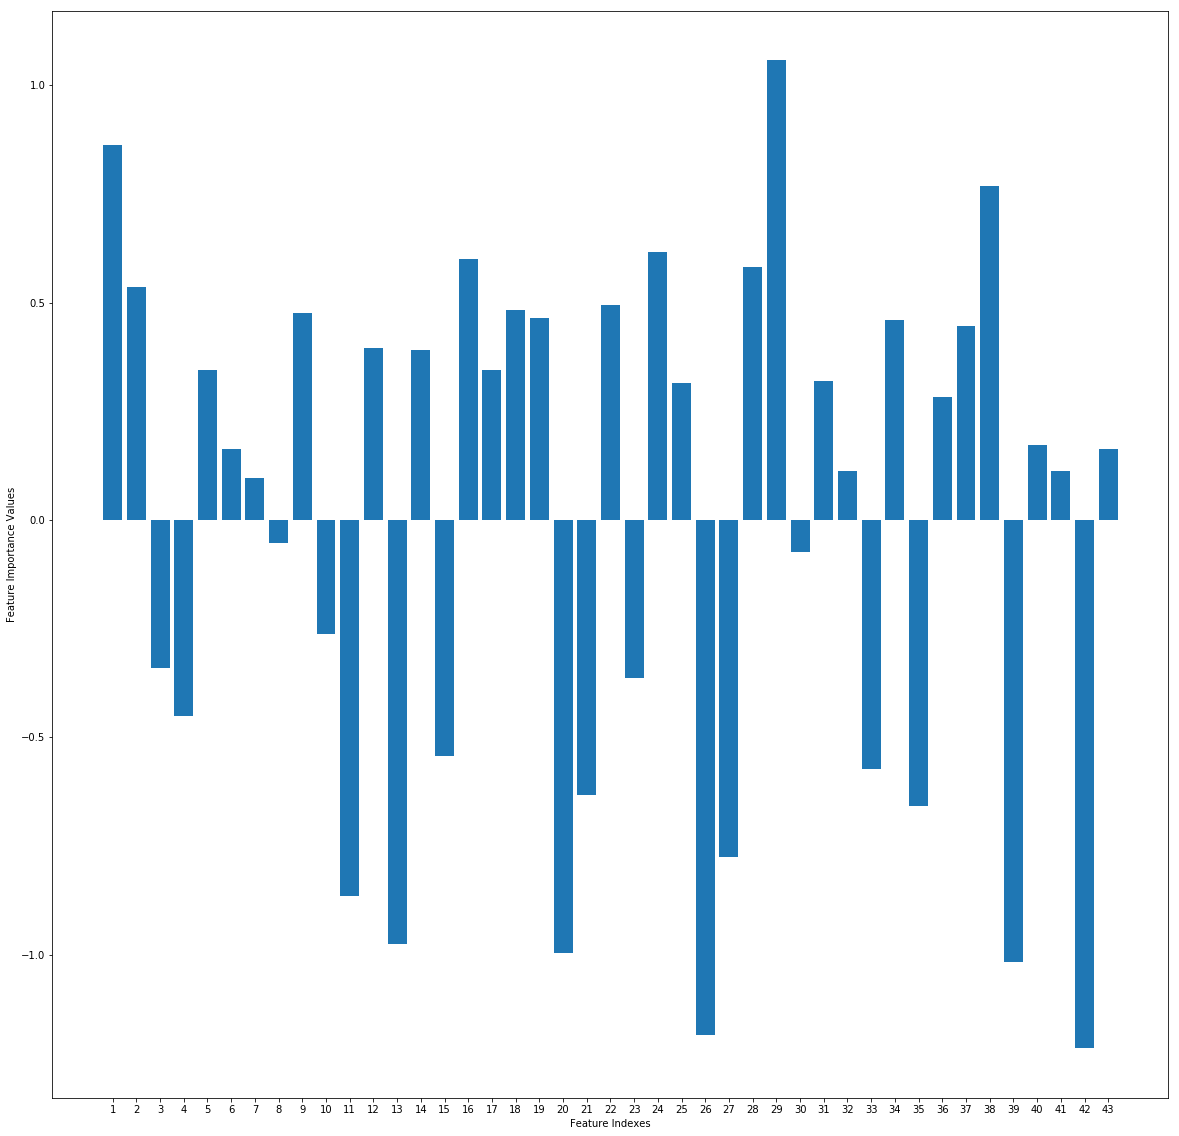

In [284]:
x_vals=np.arange(len(features))
plt.bar(x_vals,var_imp,align='center',alpha=1)
plt.xticks(x_vals,features)
plt.xlabel("Feature Indexes")
plt.ylabel("Feature Importance Values")


In [285]:
best_features=sorted(range(len(var_imp)), key=lambda i: var_imp[i], reverse=True)[:10]

In [286]:
for i in best_features:
    print(feature_names[i])

dmean
id
is_ftp_login
dwin
dloss
smean
dur
stcpb
dinpkt
dbytes


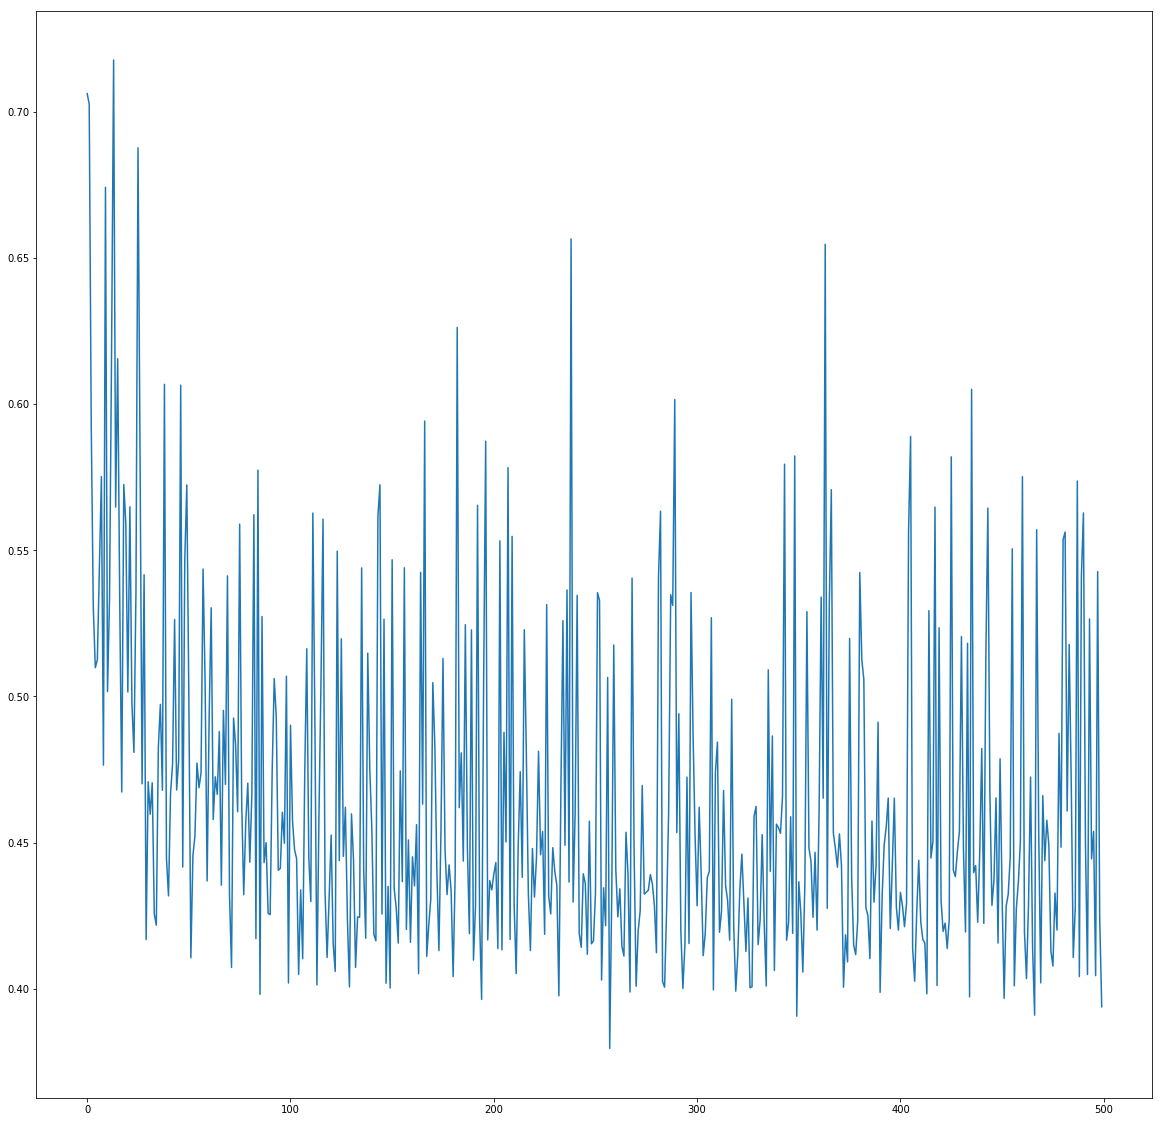

In [287]:
plt.rcParams['figure.figsize']=(20,20)
plt.plot(x,y)

In [288]:
print(np.var(var_imp))

0.35600739223942646
